In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
def load_and_flatten_images_and_labels(train_csv, test_csv):
    # Load training and testing data
    train_data = pd.read_csv(train_csv)
    test_data = pd.read_csv(test_csv)
    
    # Separate images and labels
    train_images = train_data.iloc[:, 1:].values.astype('float32')  # Pixels
    train_labels = train_data.iloc[:, 0].values.astype('int')      # Labels
    
    test_images = test_data.iloc[:, 1:].values.astype('float32')
    test_labels = test_data.iloc[:, 0].values.astype('int')
    
    return (train_images, train_labels), (test_images, test_labels)

In [3]:
def show_images(images, labels, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')  # Reshape to 28x28
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

In [4]:
# Load and process the data
(train_images, train_labels), (test_images, test_labels) = load_and_flatten_images_and_labels(
    'C:/Users/vaibh/Downloads/MINST/mnist_train.csv', 'C:/Users/vaibh/Downloads/MINST/mnist_test.csv'
)

In [5]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
train_images[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8])

In [9]:
train_labels[0]

5

In [10]:
# Normalize pixel values to the range [0, 1]
train_images /= 255.0
test_images /= 255.0

In [12]:
# Check shapes and types
print("Shape of train_images:", train_images.shape)
print("Type of train_images:", train_images.dtype)

print("Shape of train_labels:", train_labels.shape)
print("Type of train_labels:", train_labels.dtype)

Shape of train_images: (60000, 784)
Type of train_images: float32
Shape of train_labels: (60000,)
Type of train_labels: int32


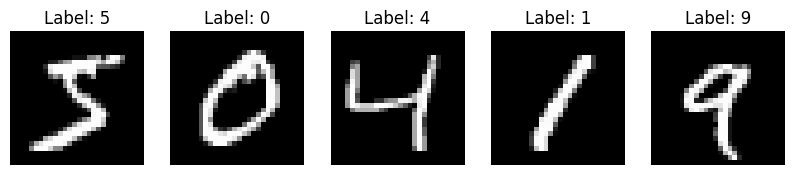

In [13]:
# Display the first 5 images and labels
show_images(train_images, train_labels, num_images=5)

In [14]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
# Convert the labels to float32 for OpenCV
train_labels = train_labels.astype('float32')
test_labels = test_labels.astype('float32')

In [18]:
# Create a KNN model using OpenCV
start_datetime = datetime.now()

knn = cv2.ml.KNearest_create()
knn.train(train_images, cv2.ml.ROW_SAMPLE, train_labels)

# Define different values of K to test
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
k_result = []

# Perform predictions for different K values
for k in k_values:
    ret, result, neighbours, dist = knn.findNearest(test_images, k=k)
    k_result.append(result)

# Flatten results for easier comparison
flattened = []
for res in k_result:
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)

end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime - start_datetime))

Training Duration: 0:17:06.561586


In [20]:
# Create an empty list to store accuracy and confusion matrices
accuracy_res = []
con_matrix = []

# Loop through results for each K and calculate metrics
for k_res in flattened:
    k_res = np.array(k_res, dtype=np.float32)  # Ensure compatibility
    cmx = confusion_matrix(test_labels, k_res)
    con_matrix.append(cmx)

    # Calculate accuracy
    matches = (k_res == test_labels)
    correct = np.count_nonzero(matches)
    accuracy = (correct / test_labels.size) * 100
    accuracy_res.append(accuracy)

# Store accuracy for plotting later
res_accuracy = {k_values[i]: accuracy_res[i] for i in range(len(k_values))}
list_res = sorted(res_accuracy.items())

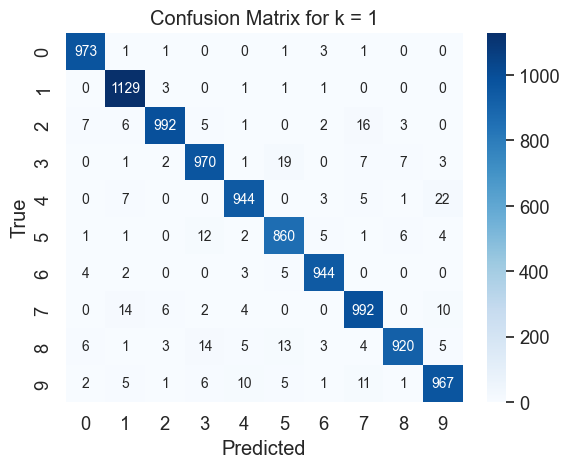

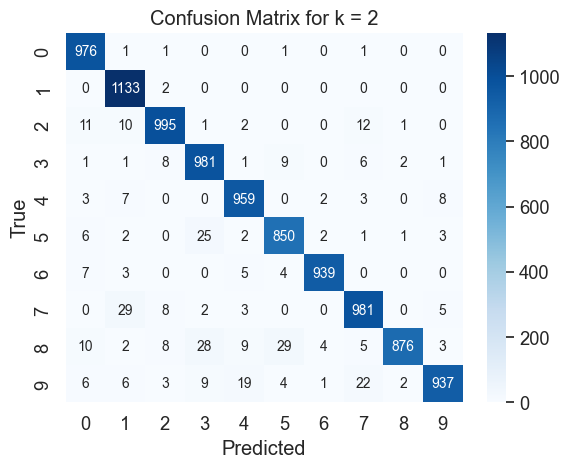

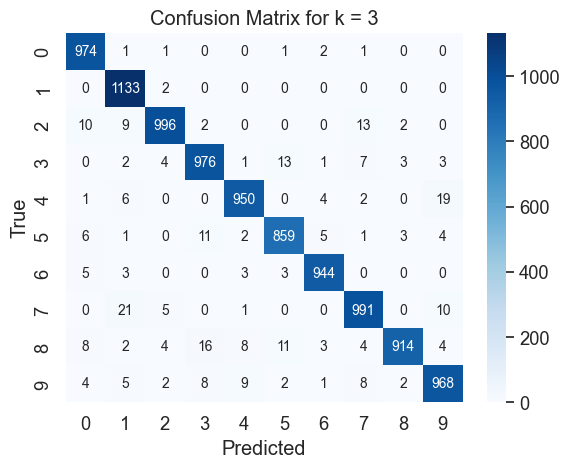

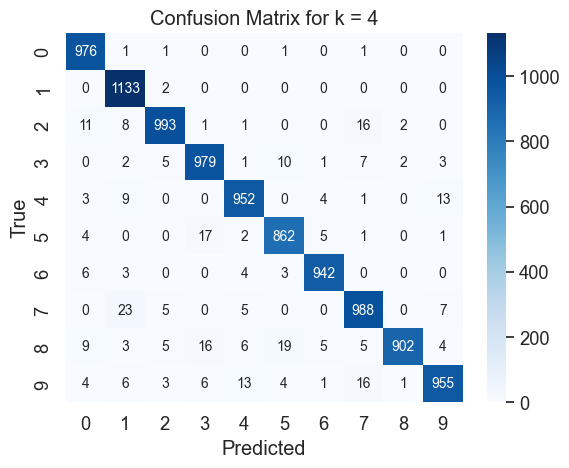

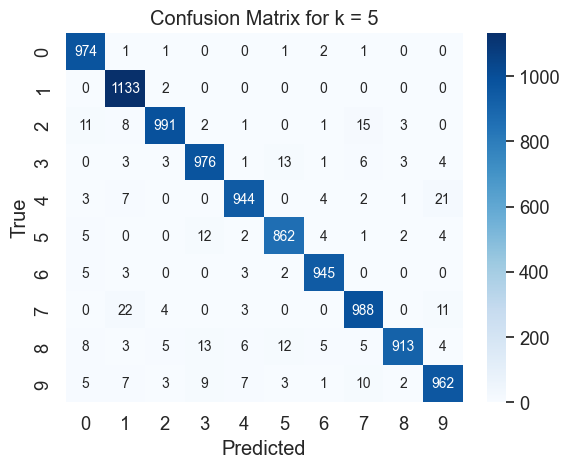

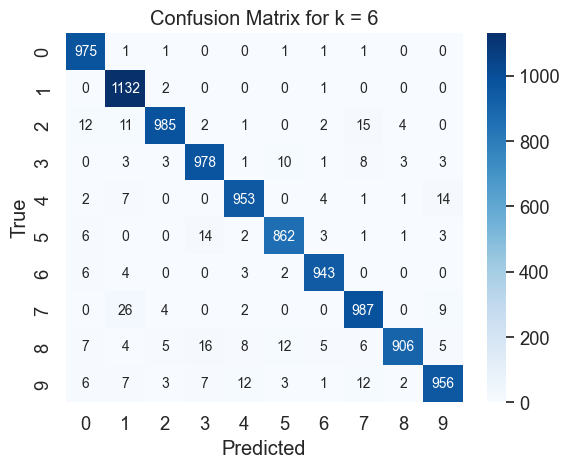

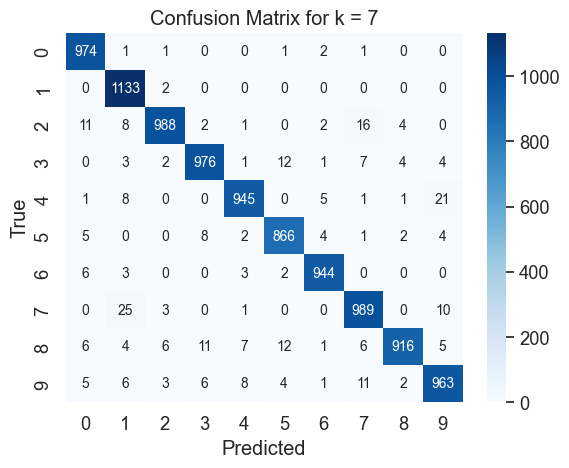

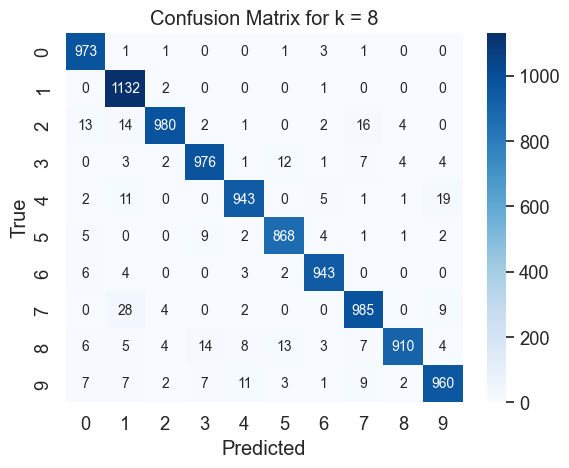

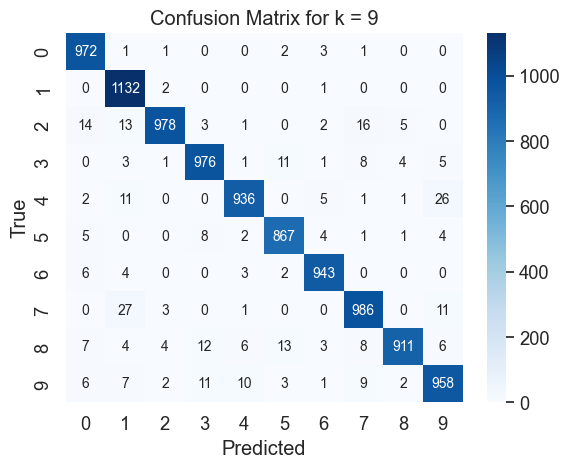

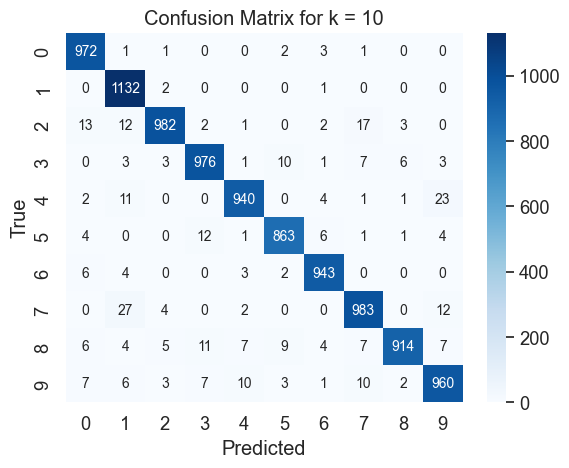

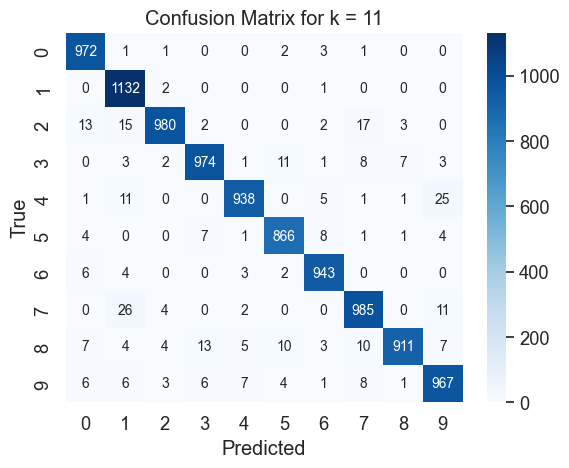

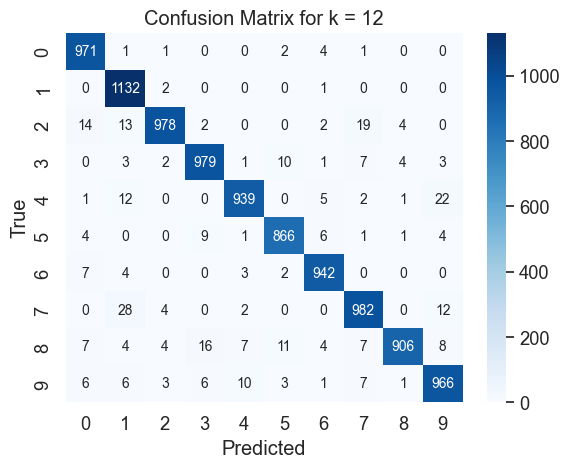

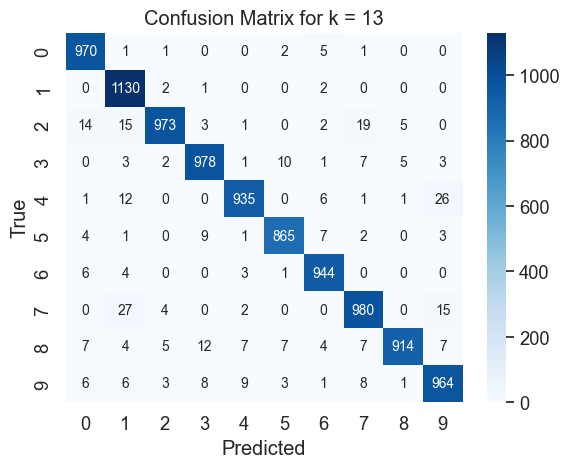

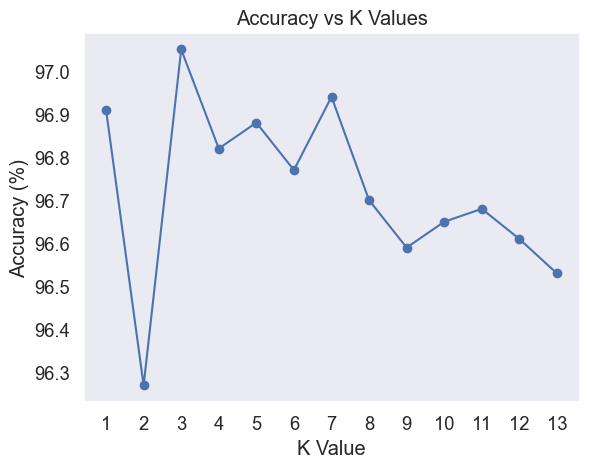

In [21]:
# Plot confusion matrices for each K value
for idx, array in enumerate(con_matrix):
    df_cm = pd.DataFrame(array, index=range(10), columns=range(10))
    sns.set(font_scale=1.2)  # Adjust for label size
    sns.heatmap(df_cm, annot=True, fmt=".0f", cmap="Blues", annot_kws={"size": 10})
    plt.title(f"Confusion Matrix for k = {k_values[idx]}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Plot accuracy for different K values
plt.plot(k_values, accuracy_res, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs K Values")
plt.xlabel("K Value")
plt.ylabel("Accuracy (%)")
plt.xticks(k_values)
plt.grid()
plt.show()

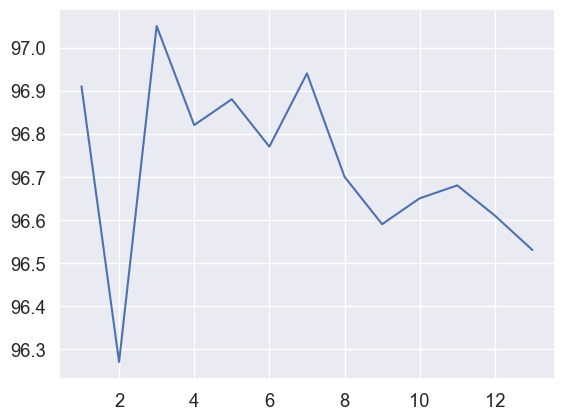

In [22]:
## plot accuracy against 
x, y = zip(*list_res)
plt.plot(x, y)
plt.show()

In [23]:
k_best = max(list_res,key=lambda item:item[1])[0]
k_best

3

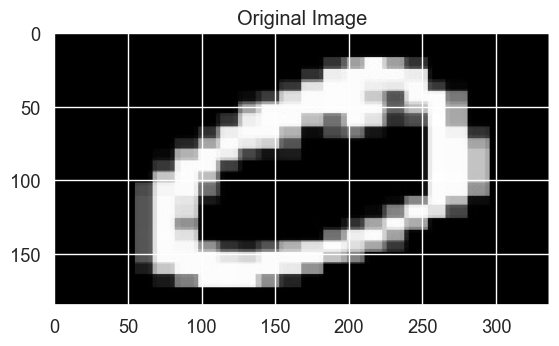

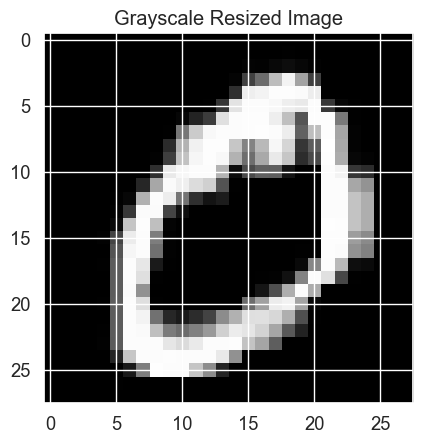

In [31]:
digit_image = cv2.imread("C:/Users/vaibh/Downloads/MINST/eg1.jpg")

# Display the original image
image_rgb = cv2.cvtColor(digit_image, cv2.COLOR_BGR2RGB)  # Convert for proper visualization
plt.imshow(image_rgb)
plt.title("Original Image")
plt.show()

# Convert to grayscale
digit_image = cv2.cvtColor(digit_image, cv2.COLOR_BGR2GRAY)

# Resize to MNIST dimensions (28x28)
digit_image = cv2.resize(digit_image, (28, 28))

# Display the processed grayscale image
plt.imshow(digit_image, cmap='gray')
plt.title("Grayscale Resized Image")
plt.show()

# Flatten the image
pixel_image = digit_image.flatten()

# Convert to float32 for OpenCV
pixel_image = np.array([pixel_image]).astype('float32')

# Normalize the image to [0, 1] (optional, depending on your model preprocessing)
pixel_image /= 255.0

In [32]:
ret,result,neighbours,dist = knn.findNearest(pixel_image,k=k_best)
print(neighbours)
# Output the result
predicted_label = int(result[0][0])  # Get the predicted label
print(f"Predicted label: {predicted_label}")

[[0. 0. 0.]]
Predicted label: 0


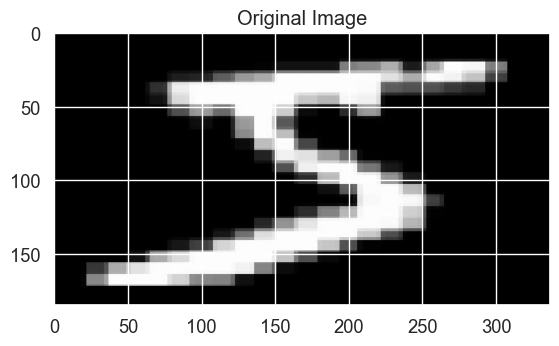

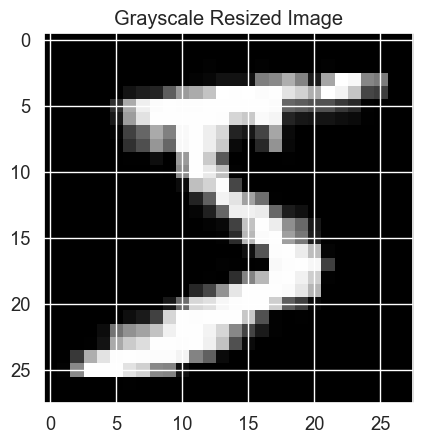

In [33]:
digit_image = cv2.imread("C:/Users/vaibh/Downloads/MINST/eg2.jpg")

# Display the original image
image_rgb = cv2.cvtColor(digit_image, cv2.COLOR_BGR2RGB)  # Convert for proper visualization
plt.imshow(image_rgb)
plt.title("Original Image")
plt.show()

# Convert to grayscale
digit_image = cv2.cvtColor(digit_image, cv2.COLOR_BGR2GRAY)

# Resize to MNIST dimensions (28x28)
digit_image = cv2.resize(digit_image, (28, 28))

# Display the processed grayscale image
plt.imshow(digit_image, cmap='gray')
plt.title("Grayscale Resized Image")
plt.show()

# Flatten the image
pixel_image = digit_image.flatten()

# Convert to float32 for OpenCV
pixel_image = np.array([pixel_image]).astype('float32')

# Normalize the image to [0, 1] (optional, depending on your model preprocessing)
pixel_image /= 255.0

In [34]:
ret,result,neighbours,dist = knn.findNearest(pixel_image,k=k_best)
print(neighbours)
# Output the result
predicted_label = int(result[0][0])  # Get the predicted label
print(f"Predicted label: {predicted_label}")

[[5. 5. 5.]]
Predicted label: 5


In [35]:
knn.save('knn_samples_for_handwritten_usingKNN.yml')